In [1]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

# uses custom metis style sheet for notebooks
from IPython.core.display import HTML
HTML("""<link rel="stylesheet" href="https://soph.info/metis/nb.css" type="text/css"/>""")


import pickle
import re
import string
import nltk
import pandas as pd
import spacy
import re
import string
from gensim import matutils, models
import scipy.sparse
from collections import Counter
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# spacy.prefer_gpu()
import logging  # Setting up the loggings to monitor gensim
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
# from sklearn.datasets import fetch_mldata
from sklearn.utils import shuffle


Populating the interactive namespace from numpy and matplotlib


In [3]:
data_df

,0,1,2,3,4,5,6,7,8,9,...,101131,101132,101133,101134,101135,101136,101137,101138,101139,101140
wsb,in the future when apple is at a share your g...,you ever stare at your account and think wow h...,buy at the top gang 🤡,almost responded to an email with thanks retar...,top trending tickers sentiments and options on...,some year old corn futures trader whos been a...,blew my account up today feels bad lost over ...,overnight gap up to ath secured,usually my balls tingle the day before a signi...,wsb after dark is going to be wild tonight i h...,...,none,none,none,none,none,none,none,none,none,none
science,the children were not motivated by achieving ...,also proved children like to gamble according ...,kind of like how gamers go through rpg games e...,i teach elementary pe to year olds one of th...,wouldnt this make lootmystery boxes even worse...,i find that very encouraging,you could have a boat or whats in this box,like when playing diablo scanned every dungeon...,i have a and year old boy by not shoving scr...,basically how ppl play rpgs they explore every...,...,none,none,none,none,none,none,none,none,none,none
ama,tldr do whatever the fuck you want,so youre telling me people on the internet lie,,this is so funny this subreddit got fucked by ...,a note about celebrity request bans when riama...,do you like cantaloupe,what does ama stand for,i liked that guy he seemed like a really nice...,hmmm ok thnx for clarifying all that but one q...,so basically rama is a shitty knockoff of rima...,...,none,none,none,none,none,none,none,none,none,none
askreddit,victorias secret was originally supposed to be...,the ford mustang it was supposed to be a car ...,heels if i remember correctly,is this how family feud gets new questions and...,skirts used to be worn in battle by men for mo...,ugg boots were originally worn by male surfers...,filtered cigarettes in general but marlboro ma...,those leg stirrups they use at the gynocologis...,my hoodie apparently,pink and blue were originally considered color...,...,shut up and take all my caps,is that butcher pete i see,happy cake day and yes maybe at bars close to ...,heppy cake day,not his ghost tho,maybe,is it my cake day i have always wondered how p...,theres a cake emoji next to your username on y...,i think my problem is that im using narwhal ed...,lol
worldnews,so was there any posts left after the purge,ok just for some context facebook has an esti...,they still havent taken down my post about mar...,why does facebook have a fake news problem be...,a lot of karens are going to be be saying they...,i bought a mask that arrived in a box that had...,this is the best tldr i could make reduced by...,why is my aunt and my crazy high school friend...,,seems low,...,none,none,none,none,none,none,none,none,none,none
funny,but i wanted the robot ferret,haha suck it you fools i already got my roboti...,this not funny rule number oh i forget carry on,but the nigerian guy is legit right,bruh when i was younger i went to a farm this ...,how do i sign up for the ferret,i was looking forward to the robotic ferret m...,mine came from a nigerian prince so its totall...,i clicked on one of those links but i did not ...,ive gotten a few and always assumed they were ...,...,none,none,none,none,none,none,none,none,none,none
dankmemes,meme of the month seeding and nominations for ...,dont have any examples and im not sure if it c...,certified hood classic,arnold schwarzerunner godtier,el dorado explanation,alignment charts sorta popular and cool to see...,the guys on a couch explaining something to t...,,where banana,chad meme,...,none,none,none,none,none,none,none,none,none,none
memes,redditmc is opening staff positions builders h...,using this to see if i have new flair,cries in bedrock edition,thank you thats very cash money of you,it wont let me connect to the server im using ...,how many have i infected,,why the fuck do i have negative karma i only p...,i need to get comment karma to be able to post...,

In [4]:
import numpy as np
import pandas as pd
data_df = pd.read_pickle('cleaned_list_df.pickle')
wsb = data_df.T['wsb'].tolist()
data_df
psy = data_df.T['memes'].tolist()
psy

['redditmc is opening staff positions builders helpers to become mod devs gamemasters  more infos ',
 'using this to see if i have new flair',
 'cries in bedrock edition',
 'thank you thats very cash money of you',
 'it wont let me connect to the server im using a cracked client',
 'how many have i infected',
 '',
 'why the fuck do i have negative karma i only posted one stupid thing 😭 lemme post again',
 'i need to get comment karma to be able to post so please upvote this',
 'oh this is back up huh',
 'might be a reason to redownload minecraft ',
 'it s license or not',
 'rip me  cause of death not having a microsoft account to play minecraft',
 '',
 'im unable to conect when i try it says connection lost readtimeoutexeption  null  is there something i can do',
 'yesss',
 'how in the server do i register',
 'ha a minecraft server what else would you want',
 'hey austin its me  back on the server havin a good time its good to be back',
 'oof i was working on one as well may be release

In [ ]:
stop_list = ['of', 'it', 'to', 'for', 'you', 'the', 'that', 'if', 'my', 'and', 'in', 'from','going', 'too', 'aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaaaaaaaaaaaaaa', 'aaaaaaaaaaaa', 'aaaaaaaa', 'aaa', 'aaaaaaaaahhhhhhhhhhhh', 'aaaaaaaand', 'aaaaaaaauuuuuugggghhh', 'aaaaaaafternoon', 'aaaaaaand', 'aaaaaand', 'aaaaall', 'aaaaalllllll', 'aaaaand', 'is', 'are', 'what', 'they', 'we', 'about', 'me', 'have', 'im', 'this', 'yeah','will','can','get','be', 'have','be', 'but']

In [6]:
# from textblob import TextBlob

vec = TfidfVectorizer(stop_words=stop_list)
matrix = vec.fit_transform(psy)
idf_df = pd.DataFrame(matrix.toarray(), columns=vec.get_feature_names())
idf_df



,aaaaa,aaaaaaaaaaaaaaaaaaaaaaaaaaaa,aaaaaaaaah,aaaw,aayyy,ababababba,abandoned,abed,abhidhamma,abilities,...,𝐿ℴ𝒂𝐟,𝓜𝓪𝓭𝓮,𝓱𝓸𝓵𝔂,𝔀𝓪𝓽𝓮𝓻,𝔀𝓲𝓽𝓱,𝕎𝕠𝕨,𝖆𝖓𝖈𝖎𝖊𝖓𝖙,𝖎𝖘,𝚃𝚑𝚒𝚜,𝚝𝚎𝚖𝚙𝚕𝚊𝚝𝚎
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101136,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm

from matplotlib import pyplot as plt
%matplotlib inline

In [8]:
from sklearn.cluster import KMeans

number_of_clusters=10
km = KMeans(n_clusters=number_of_clusters, n_jobs=-1)

km.fit(idf_df)


/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=20, n_jobs=-1)

In [20]:
idf_df

,aa,abandoned,abandoning,abandonment,abbreviated,abcd,ability,abject,able,ableist,...,zelfmoord,zero,zidenberg,zillion,zone,zoning,zoom,zooming,zuc,zurita
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.081323,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.067398,0.0,0.0,0.0,...,0.0,0.0,0.077900,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101136,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101137,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101138,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101139,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
clusters = []
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    clusters.append("Cluster {}: {}".format(i, ' '.join(top_ten_words)))
clusters

Top terms per cluster:


['Cluster 0: none is not yes but',
 'Cluster 1: are what they we about',
 'Cluster 2: yes am may please ah',
 'Cluster 3: ok boomer but zoomer gwyn',
 'Cluster 4: me not have im good',
 'Cluster 5: no oh dont homo horse',
 'Cluster 6: lol im imagine still kinda',
 'Cluster 7: on mars have be im',
 'Cluster 8: thats just why not old',
 'Cluster 9: like do looks not this',
 'Cluster 10: fuck is up this off',
 'Cluster 11: will be but mars just',
 'Cluster 12: flair have do get how',
 'Cluster 13: was thought this she but',
 'Cluster 14: its not but just at',
 'Cluster 15: repost nice this is alert',
 'Cluster 16: is this what game but',
 'Cluster 17: yeah on was hell but',
 'Cluster 18: can get be not this',
 'Cluster 19: same with as is just']

In [ ]:
labs = km.labels_
len(km.labels_)

In [ ]:
# idf_df.to_pickle("science_idf_df_with_clusters.pickle")

In [10]:
y = km.labels_

In [11]:
# Take all of the data and plot it on 2 dimensions
pca = PCA(n_components=50)
pca.fit(idf_df)
pcafeatures_train = pca.transform(idf_df)

In [12]:
# Create a plot of the PCA results
from itertools import cycle

def plot_PCA_2D(data, target, target_names):
    colors = cycle(['r','g','b','c','m','y','orange','w','aqua','yellow'])
    target_ids = range(len(target_names))
    plt.figure(figsize=(10,10))
    for i, c, label in zip(target_ids, colors, target_names):
        plt.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label, edgecolors='gray')
    plt.legend()

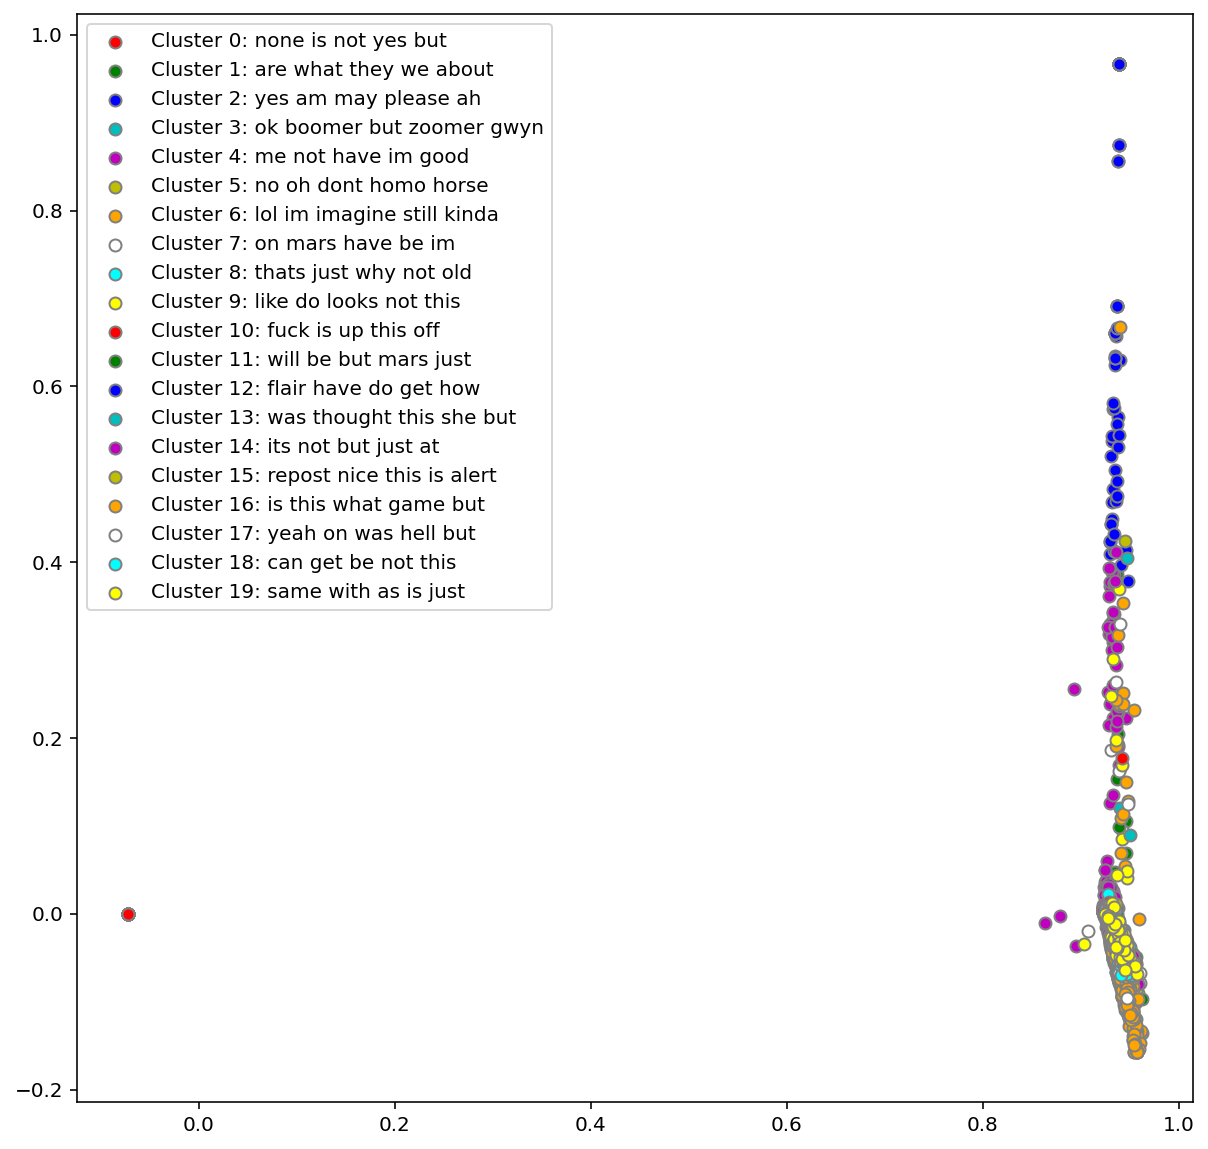

In [13]:
# plot of all the numbers
plot_PCA_2D(pcafeatures_train, target=y, target_names=clusters)

In [14]:
# sklearn implements t-SNE.
from sklearn.manifold import TSNE
from sklearn.preprocessing import scale
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)


# Import seaborn and matplotlib.patheffects to make nice plots.
import seaborn as sns
import matplotlib.patheffects as PathEffects
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})

# Random state.
RS = 20200807
# # We first reorder the data points according to the handwritten numbers.
# X = np.vstack([digits.data[digits.target==i]
#                for i in range(10)])
# y = np.hstack([digits.target[digits.target==i]
#                for i in range(10)])
digits_proj = TSNE(random_state=RS).fit_transform(pcafeatures_train)

/home/nick/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.manifold.t_sne module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.manifold. Anything that cannot be imported from sklearn.manifold is now part of the private API.
  warnings.warn(message, FutureWarning)


IndexError: index 12 is out of bounds for axis 0 with size 10

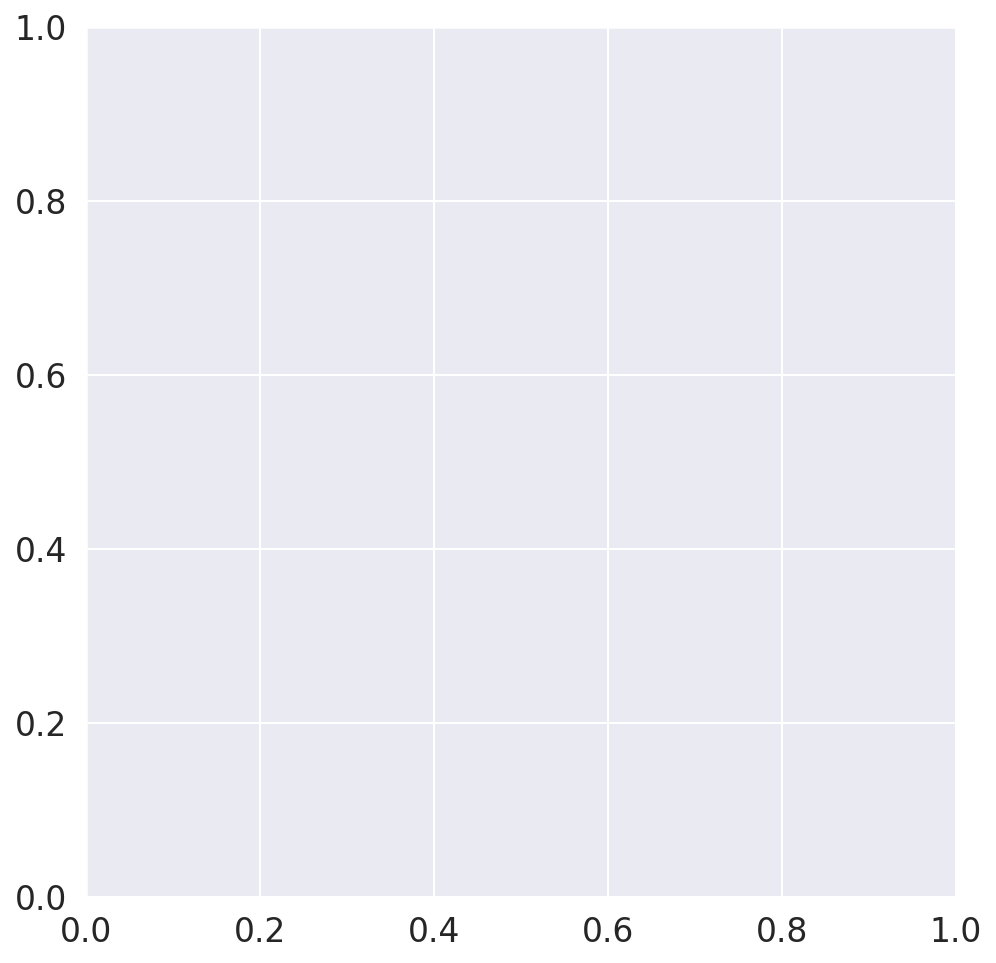

In [15]:
def scatter(x, colors):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # We add the labels for each digit.
    txts = []
    for i in range(10):
        # Position of each label.
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
scatter(digits_proj, y)

ValueError: x and y must have same first dimension, but have shapes (50,) and (1,)

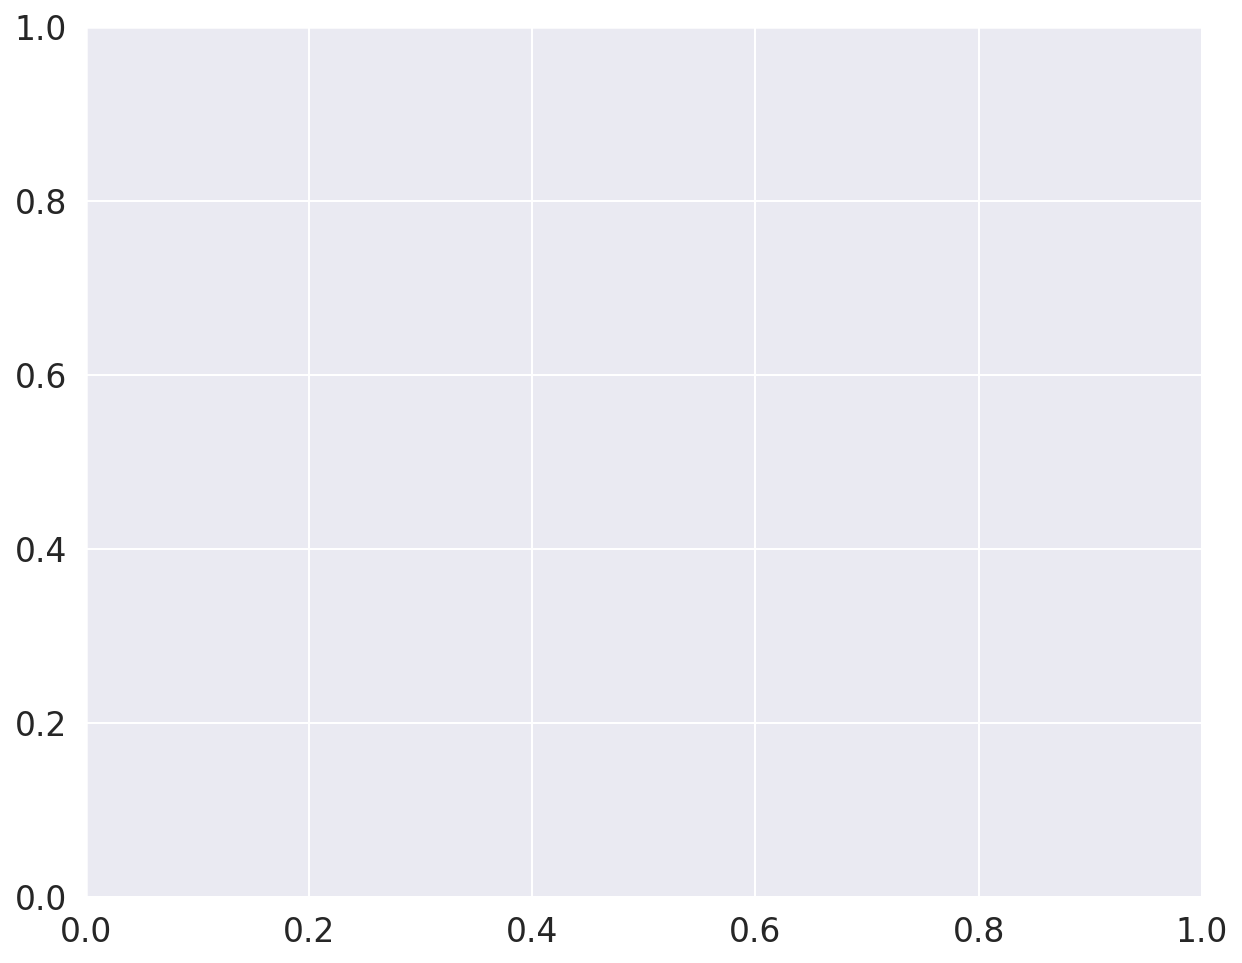

In [19]:
inert = km.inertia_

plt.figure(figsize=(10, 8))
plt.plot(range(1, 51), inert, marker='o', linestyle='--')
plt.xlabel('Num clusters')
plt.ylabel('within cluster sum of squares')
plt.show()

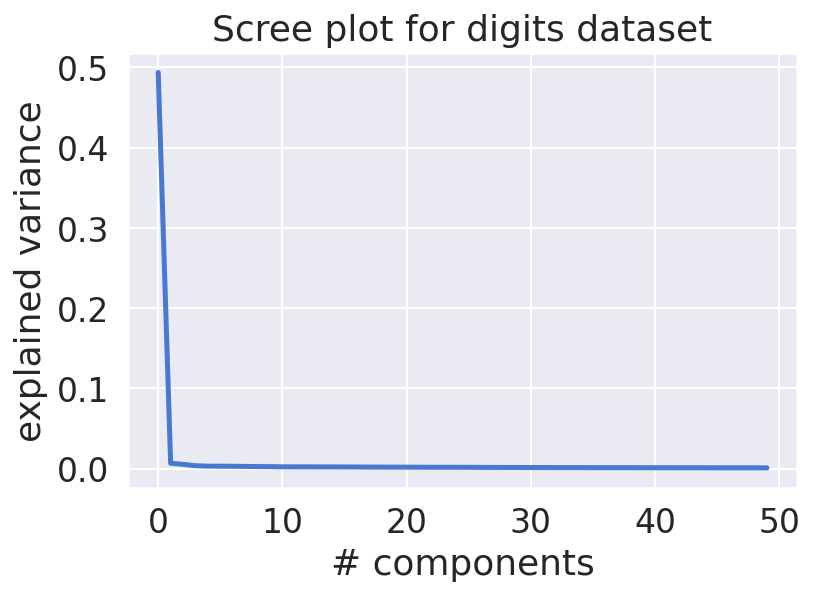

In [21]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('# components')
plt.ylabel('explained variance');
plt.title('Scree plot for digits dataset');

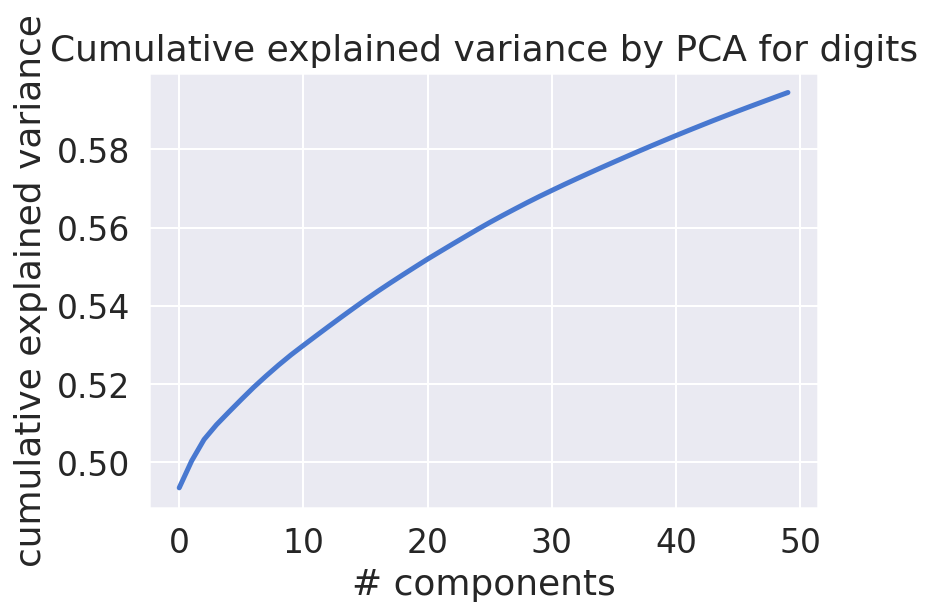

In [22]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('# components')
plt.ylabel('cumulative explained variance');
plt.title('Cumulative explained variance by PCA for digits');

In [16]:
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot


labels = km.labels_
centroids = km.cluster_centers_

for i in range(20):
    # select only data observations with cluster label == i
    ds = idf_df[np.where(labels==i)]
    # plot the data observations
    pyplot.plot(ds[:,0],ds[:,1],'o')
    # plot the centroids
    lines = pyplot.plot(centroids[i,0],centroids[i,1],'kx')
    # make the centroid x's bigger
    pyplot.setp(lines,ms=15.0)
    pyplot.setp(lines,mew=2.0)
pyplot.show()

result = zip(X , kmeans.labels_)

sortedR = sorted(result, key=lambda x: x[1])
sortedR

TypeError: '(array([ 59966,  59967,  59968, ..., 101138, 101139, 101140]),)' is an invalid key

In [23]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vec.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: none is not yes but
Cluster 1: are what they we about
Cluster 2: yes am may please ah
Cluster 3: ok boomer but zoomer gwyn
Cluster 4: me not have im good
Cluster 5: no oh dont homo horse
Cluster 6: lol im imagine still kinda
Cluster 7: on mars have be im
Cluster 8: thats just why not old
Cluster 9: like do looks not this
Cluster 10: fuck is up this off
Cluster 11: will be but mars just
Cluster 12: flair have do get how
Cluster 13: was thought this she but
Cluster 14: its not but just at
Cluster 15: repost nice this is alert
Cluster 16: is this what game but
Cluster 17: yeah on was hell but
Cluster 18: can get be not this
Cluster 19: same with as is just


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(wsb_dtm)


In [ ]:
y_kmeans = kmeans.predict(wsb_dtm)

In [ ]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'
    alpha = 0.5
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

In [ ]:
angle = np.linspace(0,2*np.pi,20, endpoint = False)
X = np.append([np.cos(angle)],[np.sin(angle)],0).transpose()
display_cluster(wsb_dtm)

In [ ]:
num_clusters = 2
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(data_dtmn)
display_cluster(data_dtmn,km,num_clusters)

In [ ]:
num_clusters = 7
km = KMeans(n_clusters=num_clusters)
km.fit(data_dtmn.transpose())
display_cluster(data_dtmn.transpose(),km,num_clusters)